UFCG/CEEI/DEE - Campus de Campina Grande - Disciplina: Controle Analógico

Terceira avaliação - Atividade 4 - Período: 2021.1 - Professor: Saulo O. D. Luiz

**Nome: Filipe Soares Donato**

**Matrícula: 120111402**

Caros alunos e alunas,

Crie uma cópia deste notebook do colab por meio do menu Arquivo / Salvar uma cópia no Drive, e inclua seu nome e matrícula no nome do notebook.

Os itens identificados como (Cálculos à mão) devem ser respondidos à mão no papel ou mesa digitalizadora. É possível anexar a imagem digitalizada neste notebook do colab, ou fazer upload de um pdf na atividade. Por favor não anexem jpg ou png.

Os demais itens podem ser respondidos na forma de código no Python, resultados de cálculos e simulações nas células identificadas como (#Resposta), e texto nas células identificadas como (Resposta) neste notebook do colab.

Realize upload do notebook como arquivo do seu Drive. Por favor, não faça upload do link do arquivo.

Boa sorte!

In [4]:
pip install control #Instalação da biblioteca de sistemas de controle do Python

# Pergunta

Considere um sistema cuja resposta em frequência $H(j \omega)$ foi determinada experimentalmente, como apresentado na Figura 1. Os dados obtidos são apresentados no código em Python a seguir. Justifique todas as respostas.

a.   (0.5 ponto) Determine e justifique o tipo do sistema $H(s)$ e a constante de erro estático (de posição, velocidade ou aceleração).

b.   (1.5 pontos) (Cálculos à mão) Considere o sistema de controle apresentado na Figura 2. Determine os parâmetros de um compensador PID para que sejam satisfeitas as seguintes especificações da função de transferência em malha aberta: margem de fase de $70^\circ$ na frequência de cruzamento de ganho de $2.5 rad/s$; e a seguinte especificação da função de transferência de malha fechada: se a entrada de referência for uma rampa, o erro em regime permanente deve ser igual a $0.2$. Apresente ao final a função de transferência do controlador. 

c.   (0.5 pontos) Por meio das respostas em frequência do sistema e do controlador, verifique se as especificações de margem de fase e a frequência de cruzamento do ganho foram atendidas.

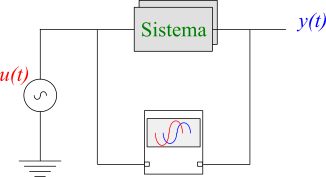

Figura 1: diagrama elétrico para a estimação da resposta em frequência de um sistema.

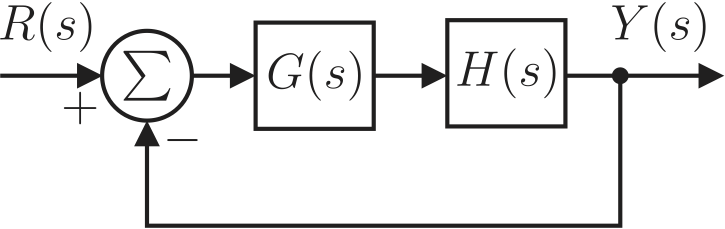

Figura 2: Sistema de controle em malha fechada.

Frequência, w (rad/s)    Magnitude, 20*log10|H(jw)| (dB)    Fase arg(H(jw)) (˚)
               0.0005                        29.11853085            -0.28811353
                0.001                        29.11820607            -0.57621274
               0.0015                        29.11766482            -0.86428331
                0.002                        29.11690719            -1.15231093
               0.0025                        29.11593329             -1.4402813
                0.003                        29.11474326            -1.72818015
               0.0035                        29.11333729            -2.01599321
                0.004                        29.11171558            -2.30370625
               0.0045                        29.10987838            -2.59130507
                0.005                        29.10782597            -2.87877551
                0.005                        29.10782597            -2.87877551
               0.0055                   

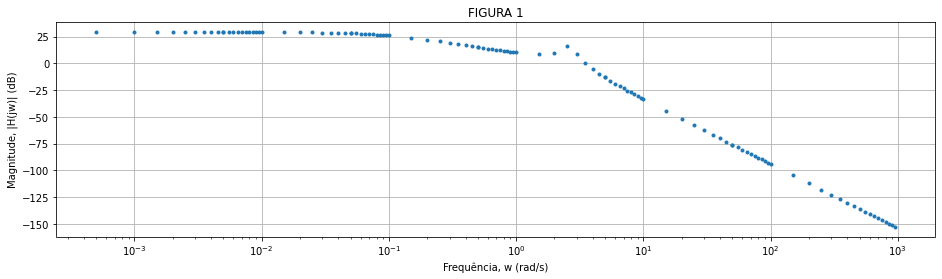

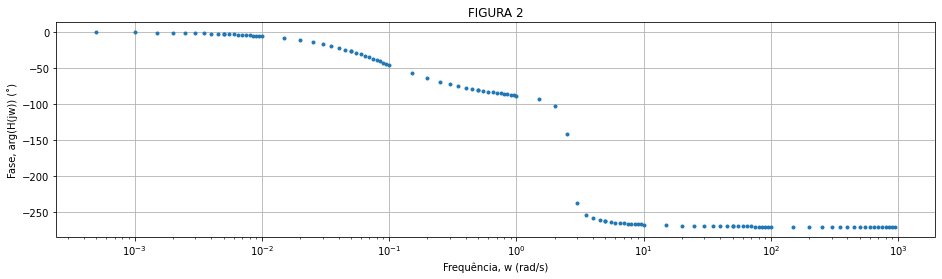


 ------------------------------------------------------------

 Utilizando CURVE_FIT:

CpdB =  [29.10261636]
Cp =  [28.51877179]


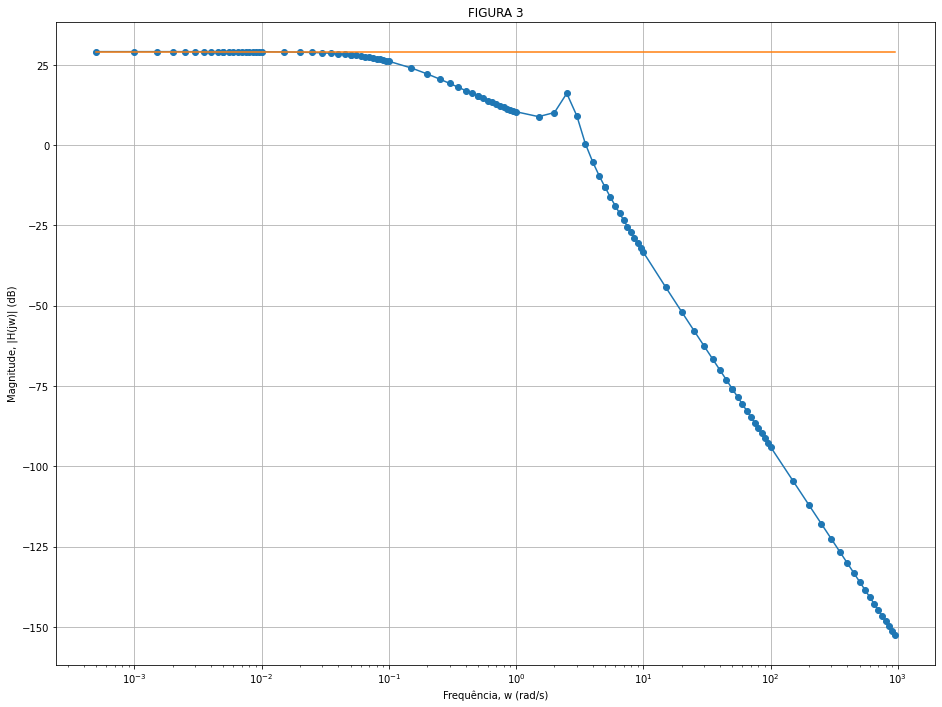

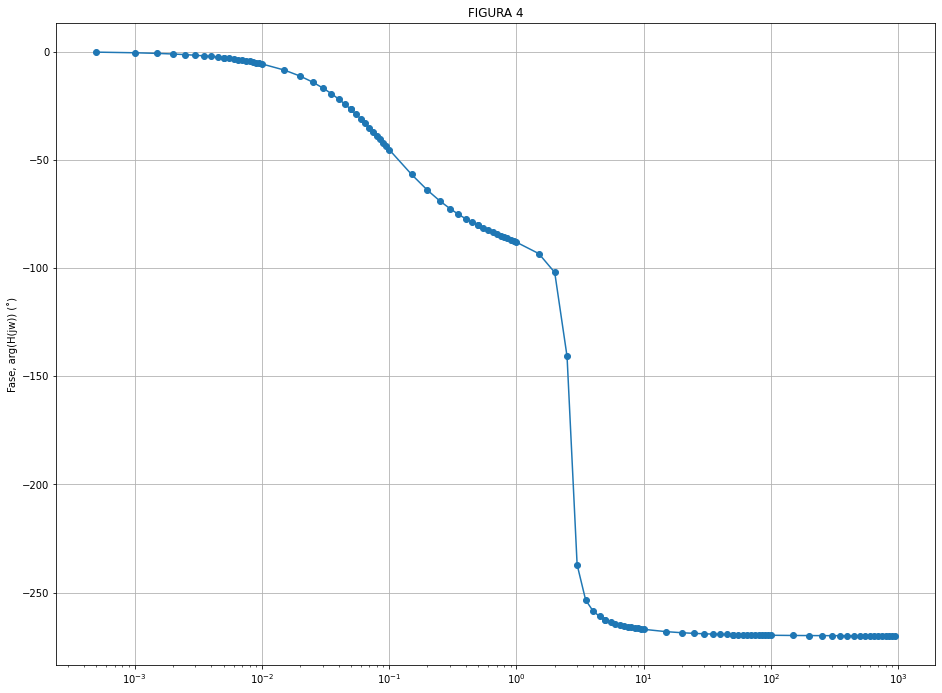

In [6]:
#Resposta
from numpy import *
from control.matlab import *
import matplotlib.pyplot as plt
from cmath import polar, phase
from math import degrees
from cmath import exp, pi
from scipy.optimize import curve_fit
import numpy as np
import control.matlab as mat
cm = 1/2.54  # centimetros em polegadas

def imprimirRespostaEmFrequencia(omega, arrayabsHjwdB, arrayargHjw):
   print('Frequência, w (rad/s)    Magnitude, 20*log10|H(jw)| (dB)    Fase arg(H(jw)) (˚)')
   for k in range(0,len(omega)):
     print(f'{omega[k]:21}{arrayabsHjwdB[k]:35}{arrayargHjw[k]:23}')

def assintotasBaixasFrequencias(w, kdB):
  return kdB

#Frequência, w (rad/s):  
omega = [5.0e-04, 1.0e-03, 1.5e-03, 2.0e-03, 2.5e-03, 3.0e-03, 3.5e-03,
       4.0e-03, 4.5e-03, 5.0e-03, 5.0e-03, 5.5e-03, 6.0e-03, 6.5e-03,
       7.0e-03, 7.5e-03, 8.0e-03, 8.5e-03, 9.0e-03, 9.5e-03, 1.0e-02,
       1.5e-02, 2.0e-02, 2.5e-02, 3.0e-02, 3.5e-02, 4.0e-02, 4.5e-02,
       5.0e-02, 5.0e-02, 5.5e-02, 6.0e-02, 6.5e-02, 7.0e-02, 7.5e-02,
       8.0e-02, 8.5e-02, 9.0e-02, 9.5e-02, 1.0e-01, 1.5e-01, 2.0e-01,
       2.5e-01, 3.0e-01, 3.5e-01, 4.0e-01, 4.5e-01, 5.0e-01, 5.0e-01,
       5.5e-01, 6.0e-01, 6.5e-01, 7.0e-01, 7.5e-01, 8.0e-01, 8.5e-01,
       9.0e-01, 9.5e-01, 1.0e+00, 1.5e+00, 2.0e+00, 2.5e+00, 3.0e+00,
       3.5e+00, 4.0e+00, 4.5e+00, 5.0e+00, 5.0e+00, 5.5e+00, 6.0e+00,
       6.5e+00, 7.0e+00, 7.5e+00, 8.0e+00, 8.5e+00, 9.0e+00, 9.5e+00,
       1.0e+01, 1.5e+01, 2.0e+01, 2.5e+01, 3.0e+01, 3.5e+01, 4.0e+01,
       4.5e+01, 5.0e+01, 5.0e+01, 5.5e+01, 6.0e+01, 6.5e+01, 7.0e+01,
       7.5e+01, 8.0e+01, 8.5e+01, 9.0e+01, 9.5e+01, 1.0e+02, 1.5e+02,
       2.0e+02, 2.5e+02, 3.0e+02, 3.5e+02, 4.0e+02, 4.5e+02, 5.0e+02,
       5.5e+02, 6.0e+02, 6.5e+02, 7.0e+02, 7.5e+02, 8.0e+02, 8.5e+02,
       9.0e+02, 9.5e+02]

#Magnitude, 20*log10|H(jw)| (dB):  
arrayabsHjwdB = [  29.11853085,   29.11820607,   29.11766482,   29.11690719,
         29.11593329,   29.11474326,   29.11333729,   29.11171558,
         29.10987838,   29.10782597,   29.10782597,   29.10555864,
         29.10307675,   29.10038065,   29.09747076,   29.0943475 ,
         29.09101134,   29.08746277,   29.08370233,   29.07973055,
         29.07554804,   29.02228195,   28.9487964 ,   28.85611642,
         28.7454782 ,   28.6182784 ,   28.47602209,   28.3202726 ,
         28.15260616,   28.15260616,   27.97457322,   27.7876671 ,
         27.59330051,   27.3927891 ,   27.1873415 ,   26.97805473,
         26.76591385,   26.55179487,   26.33646996,   26.12061423,
         24.02744828,   22.17814134,   20.59225766,   19.22972941,
         18.04802991,   17.01261296,   16.09698201,   15.28097991,
         15.28097991,   14.54916176,   13.88955103,   13.29274103,
         12.7512534 ,   12.25907864,   11.81134356,   11.40406787,
         11.03398366,   10.69840028,   10.39510196,    8.87689571,
         10.14838585,   16.11665632,    9.11736301,    0.4341639 ,
         -5.24329772,   -9.56953036,  -13.11927544,  -13.11927544,
        -16.15526057,  -18.82123464,  -21.20544063,  -23.36649213,
        -25.34560665,  -27.17304178,  -28.87176583,  -30.45968707,
        -31.95107744,  -33.35752003,  -44.27383674,  -51.88975882,
        -57.75917622,  -62.53968677,  -66.57431593,  -70.06538067,
        -73.14244056,  -75.89354262,  -75.89354262,  -78.38128371,
        -80.65177527,  -82.73997402,  -84.67301628,  -86.47239161,
        -88.15540951,  -89.73621853,  -91.22653238,  -92.63615874,
        -93.97339176, -104.54220577, -112.03969813, -117.85483955,
       -122.60600798, -126.62299242, -130.10262417, -133.1718543 ,
       -135.91736009, -138.4009629 , -140.66830827, -142.75405932,
       -144.68515991, -146.48296911, -148.16470546, -149.7444525 ,
       -151.2338765 , -152.64274985]
#Fase arg(H(jw)) (˚):  
arrayargHjw = [  -0.28811353,   -0.57621274,   -0.86428331,   -1.15231093,
         -1.4402813 ,   -1.72818015,   -2.01599321,   -2.30370625,
         -2.59130507,   -2.87877551,   -2.87877551,   -3.16610342,
         -3.45327473,   -3.74027539,   -4.02709141,   -4.31370886,
         -4.60011385,   -4.88629258,   -5.1722313 ,   -5.45791632,
         -5.74333405,   -8.57987784,  -11.37541708,  -14.11810183,
        -16.7974781 ,  -19.40465768,  -21.93240098,  -24.37511963,
        -26.72881144,  -26.72881144,  -28.99094345,  -31.16029951,
        -33.236808  ,  -35.22136263,  -37.11564696,  -38.92196968,
        -40.6431157 ,  -42.28221526,  -43.84263198,  -45.32786927,
        -56.80261066,  -64.093492  ,  -69.02441843,  -72.55995747,
        -75.22076934,  -77.30376431,  -78.9880486 ,  -80.38722372,
        -80.38722372,  -81.57653327,  -82.60770845,  -83.5174867 ,
        -84.33271432,  -85.07352081,  -85.7553612 ,  -86.39037025,
        -86.98828517,  -87.55709076,  -88.1034817 ,  -93.3851588 ,
       -102.06901195, -140.83949231, -237.12709103, -253.43200578,
       -258.48730583, -260.99075097, -262.51404542, -262.51404542,
       -263.55293164, -264.31422012, -264.9001632 , -265.3674697 ,
       -265.75031036, -266.07060781, -266.34313357, -266.57824   ,
       -266.78342004, -266.96424463, -268.04148374, -268.54735825,
       -268.84378283, -269.03912903, -269.17775504, -269.2813047 ,
       -269.36162735, -269.42576519, -269.42576519, -269.4781703 ,
       -269.52179678, -269.55868264, -269.59027968, -269.61765034,
       -269.64159013, -269.66270655, -269.68147156, -269.69825746,
       -269.71336181, -269.80896689, -269.85674065, -269.88539825,
       -269.90450114, -269.91814517, -269.92837779, -269.93633628,
       -269.94270295, -269.94791197, -269.95225278, -269.95592574,
       -269.95907398, -269.96180244, -269.96418983, -269.96629634,
       -269.96816879, -269.96984414]

imprimirRespostaEmFrequencia(omega, arrayabsHjwdB, arrayargHjw)
#--------------------------------------------------------------------
#Representar o código acima nas figuras
plt.figure(1, figsize=(40*cm, 10*cm))
plt.semilogx(omega, arrayabsHjwdB,'.') 
plt.title("FIGURA 1")
plt.ylabel('Magnitude, |H(jw)| (dB)')
plt.xlabel('Frequência, w (rad/s)') 
plt.grid(True)
plt.show()

plt.figure(2,figsize=(40*cm, 10*cm))
plt.semilogx(omega,arrayargHjw,'.') 
plt.title("FIGURA 2")
plt.ylabel('Fase, arg(H(jw)) (˚)')
plt.xlabel('Frequência, w (rad/s)')
plt.grid(True) 
plt.show()

#------------------------------------------------------------------------

print('\n ------------------------------------------------------------')
print('\n Utilizando CURVE_FIT:\n')

CpdB, pcov = curve_fit(assintotasBaixasFrequencias, omega[1:21], arrayabsHjwdB[1:21])
Cp = 10**(CpdB/20)      #Para nenhum polo na origem -> TIPO ZERO
print('CpdB = ', CpdB)  #importante esse valor
print('Cp = ', Cp)      #Importante esse valor

plt.figure(3, figsize=(40*cm, 30*cm))
plt.semilogx(omega,arrayabsHjwdB,'-o', omega, CpdB*ones((len(omega), 1)), '-') 
plt.title("FIGURA 3")
plt.ylabel('Magnitude, |H(jw)| (dB)')
plt.xlabel('Frequência, w (rad/s)') 
plt.grid(True)
plt.show()

plt.figure(4,figsize=(40*cm, 30*cm))
plt.semilogx(omega,arrayargHjw,'-o') 
plt.title("FIGURA 4")
plt.ylabel('Fase, arg(H(jw)) (˚)')
plt.grid(True)
plt.show()

# Resposta letra A

O sistema é do tipo 0, porque a assíntota de magnitude de baixas frequências é constante. A constante de erro estático de posição em $dB$ é $29.10dB$
\begin{equation*}
20 log C_p = 29.10 \Rightarrow C_p = 10^{29.10/20} = 28.53
\end{equation*}

# Resposta letra B

A partir da tabela, verifica-se que em $\omega _{PM}$:
\begin{equation*}
20 log \left| H\left( j\omega_{PM}\right) \right| = 16.116 \Rightarrow \left| H\left( j\omega_{PM}\right) \right| = 10^{16.116/20} = 6.394
\end{equation*}

E

\begin{equation*}
\measuredangle H\left( j\omega _{PM}\right) = -140.839^{\circ}
\end{equation*}

Então

\begin{equation*}
\theta = \measuredangle G\left( j\omega_{PM}\right) = -180^\circ +PM - \measuredangle H\left( j\omega _{PM}\right) = -180^\circ +70^\circ - (-140.839^\circ) = 30.839^\circ
\end{equation*}

Já para Ess temos que

\begin{equation*}
e_{ss} = \frac{1}{C_v} \Rightarrow C_v = \frac{1}{e_{ss}}
\end{equation*}

Daí 

\begin{equation*}
C_v = \lim_{s\rightarrow 0}sG(s)H(s) = \lim_{s\rightarrow 0}s\frac{k_ps + k_i + k_d s^2}{s} H(s) = \lim_{s\rightarrow 0} k_i H(s) = k_i \lim_{s\rightarrow 0} H(s) = k_ i C_p
\end{equation*}

Logo

\begin{equation*}
k_i C_p = \frac{1}{e_{ss}} \Rightarrow k_i = \frac{1}{e_{ss} C_p} = 0.175
\end{equation*}

Encontramos o valor de Ki, agora vamos para Kp:

\begin{equation*}
k_p = \frac{\cos \theta}{\left| H\left( j\omega_{PM}\right) \right|} = 0.134
\end{equation*}

E agora vamos para Kd:

\begin{equation*}
k_d = \frac{\sin \theta}{\omega _{PM} \left| H\left( j\omega_{PM}\right) \right|} + \frac{k_i}{\omega^2_{PM}} = 0.060
\end{equation*}

Logo os 3 valores encontrados foram:

$k_i = 0.1753$, $k_p = 0.1343$, $k_d = 0.601$

Por fim, a função G(s) que é o controlador assume a forma:

\begin{equation*}
G\left( s\right) = Kp+ \frac{Ki}{s} + Kds
\end{equation*}

\begin{equation*}
G\left( s\right) = 0.1343+ \frac{0.1753}{s} + 0.0601s
\end{equation*}


 arg(H(jwPM))= -140.83949231 ˚

 |H(jwPM)|= 6.394886135072761

 theta= 30.839492309999997 ˚
Ki =  [0.17532312]     Kp =  0.13426458869864613     Kd =  [0.060117]

 G(s) =  
0.06012 s^2 + 0.1343 s + 0.1753
-------------------------------
               s


 |G(jwPM)H(jwPM)| =  0.0  dB

 PM =  70.0 , em wPM =  2.5 rad/s




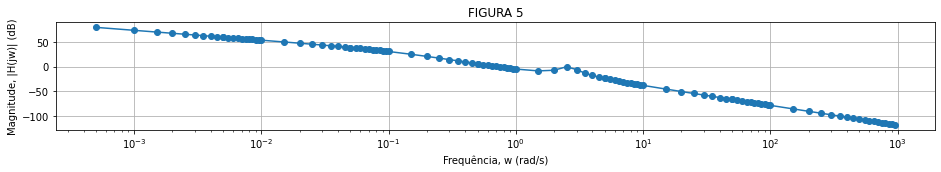

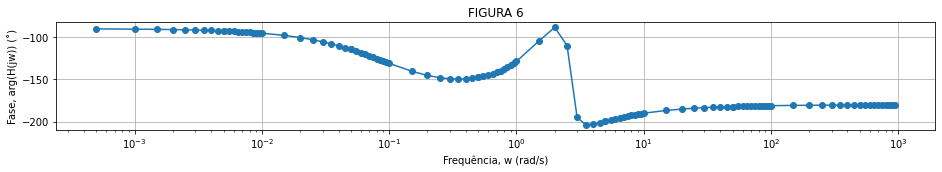

In [7]:
#Resposta letra J
from numpy import *
from control.matlab import *
import matplotlib.pyplot as plt
from cmath import polar, phase
from math import degrees
from cmath import exp, pi
from scipy.optimize import curve_fit
import numpy as np
import control.matlab as mat
cm = 1/2.54  # centimetros em polegadas

## Projeto do PID---------------------------------
PM = 70          # graus
wPM = 2.5        # rad/s
ess_max = 0.2    #Erro em regime permanente

argHjwPM = interp(wPM, omega, arrayargHjw)
print('\n arg(H(jwPM))=', argHjwPM, '˚')

absHjwPMdB = interp(wPM, omega, arrayabsHjwdB)
absHjwPM = db2mag(absHjwPMdB)
print('\n |H(jwPM)|=', absHjwPM)

theta = -180+PM-argHjwPM
print('\n theta=', theta, '˚')

kp = cos(pi/180*theta)/absHjwPM
ki = 1/(ess_max*Cp)
kd = sin(pi/180*theta)/(wPM*absHjwPM)+ki/wPM**2;
print("Ki = ",ki,"    Kp = ",kp,"    Kd = ",kd)

s = tf("s");

#Escrever a função do controlador, considerar Pd=1000
#G = kp + ki/s + kd*pd*s/(s+pd) 
#com ação derivativa filtrada
G = kp + ki/s + kd*s;
print('\n G(s) = ', G)

arrayabsGjw, arrayargGjw, omega = freqresp(G, omega)

arrayabsGHjwdB = arrayabsHjwdB + 20*log10(arrayabsGjw)
arrayargGHjw = arrayargHjw + 180.0/pi*arrayargGjw

absGHjwPM = interp(wPM, omega, arrayabsGHjwdB)
argGHjwPM = interp(wPM, omega, arrayargGHjw)
print('\n |G(jwPM)H(jwPM)| = ', absGHjwPM, ' dB')
print('\n PM = ', argGHjwPM+180, ', em wPM = ', wPM, 'rad/s')
print ('\n')

plt.figure(5,figsize=(40*cm, 5*cm))
plt.semilogx(omega,arrayabsGHjwdB,'-o') 
plt.title("FIGURA 5")
plt.ylabel('Magnitude, |H(jw)| (dB)')
plt.xlabel('Frequência, w (rad/s)') 
plt.grid(True)
plt.show()

plt.figure(6,figsize=(40*cm, 5*cm))
plt.semilogx(omega,arrayargGHjw,'-o') 
plt.title("FIGURA 6")
plt.ylabel('Fase, arg(H(jw)) (˚)')
plt.xlabel('Frequência, w (rad/s)') 
plt.grid(True)
plt.show()

# Resposta Letra C

As especificações de margem de fase e a frequência de cruzamento do ganho foram atendidas, temos $PM = 70°$ em $Wpm = 2.5 rad/s$ e também $Ess = 0.2$.

O código abaixo exemplifica.

In [9]:
#Resposta letra K
from numpy import *
from control.matlab import *
import matplotlib.pyplot as plt
from cmath import polar, phase
from math import degrees
from cmath import exp, pi
from scipy.optimize import curve_fit
import numpy as np
import control.matlab as mat
cm = 1/2.54  # centimetros em polegadas

PM = 70
wPM = 2.5
ess = 0.2

magPMdB = np.interp(wPM, omega, arrayabsHjwdB)
argPM = np.interp(wPM, omega, arrayargHjw)

magPM = 10**(magPMdB/20)
print('|H(jwPM)| =', magPM)
print('\nÂngulo H(jwPM) =', argPM, 'graus')

theta = -180 + PM - argPM
print('\nθ =', theta, 'graus')

Kp = np.cos(np.radians(theta))/magPM
print('\nKp = ', Kp)

CpdB, pcov = curve_fit(assintotasBaixasFrequencias, omega[1:21], arrayabsHjwdB[1:21])
Cp = 10**(CpdB/20)
print('\nCpdB = ', CpdB)
print('\nCp = ', Cp)

Ki = (1/(Cp*ess))[0]
print('\nKi = ', Ki)

Kd = np.sin(np.radians(theta)) / (wPM * magPM) + Ki / (wPM**2)
print('\nKd = ', Kd)

s= mat.tf('s')
H = Kp + Ki/s + Kd*s 
print('\nH(s) = ', H)

arrayabsGjw, arrayargGjw, omega = freqresp(H, omega) 

arrayabsGHjwdB = arrayabsHjwdB + 20* log10(arrayabsGjw) 
arrayargGHjw = arrayargHjw + 180.0/pi*arrayargGjw 

absGHjwPM = interp(wPM, omega, arrayabsGHjwdB) 
argGHjwPM = interp(wPM, omega, arrayargGHjw) 

print('\n|H(jwPM)G(jwPM)| =', absGHjwPM, 'em Wpm =', wPM, 'rad/s')
print('\nPM = ', argGHjwPM+ 180, 'graus')

|H(jwPM)| = 6.394886135072761

Ângulo H(jwPM) = -140.83949231 graus

θ = 30.839492309999997 graus

Kp =  0.13426458869864613

CpdB =  [29.10261636]

Cp =  [28.51877179]

Ki =  0.17532311831542433

Kd =  0.06011699537954224

H(s) =  
0.06012 s^2 + 0.1343 s + 0.1753
-------------------------------
               s


|H(jwPM)G(jwPM)| = 0.0 em Wpm = 2.5 rad/s

PM =  70.0 graus
